### Codio Activity 6.3: Plotting and Interpreting Singular Values

**Expected Time: 60 Minutes**

**Total Points: 20 Points**

This activity focuses on building a scree plot with Python.  A scree plot can be used to determine how many Principal Components to keep in a given dataset.  Using an `sklearn` built in housing dataset, you will plot the values of $\Sigma$ in decreasing order -- this is a scree plot.  For more on scree plots see [here](https://en.wikipedia.org/wiki/Scree_plot#:~:text=In%20multivariate%20statistics%2C%20a%20scree,principal%20component%20analysis%20(PCA).).

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from scipy.linalg import svd
from sklearn.datasets import make_regression

In [2]:
housing = fetch_california_housing(as_frame = True)

In [3]:
df = housing.frame.drop('MedHouseVal', axis = 1)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.shape

(20640, 8)

[Back to top](#Index:) 

## Problem 1

### Extracting $\Sigma$

**10 Points**

Complete the function `singular_values` below that takes in a scaled or unscaled array of features and returns the $\Sigma$ matrix from the SVD decomposition.  In this exercise make sure to pay attention to the `scale` argument -- by default we will not scale the data.

In [6]:
### GRADED

def singular_values(X, scale = False):
    """Return the singular values resulting from 
    SVD decomposition.  

    Parameters
    ----------
    X: np.array or pd.DataFrame
        An array of data
    scale: boolean
        Boolean determines whether data needs to be scaled

    Returns an numpy array of singular values of X
    """
    # YOUR CODE HERE 
    return None # replace with your return statement

# YOUR CODE HERE
#raise NotImplementedError()
def singular_values(X, scale = False):
    # check if it is scaled already
    if scale:
        mu = X.mean()
        s = X.std()
        Xnorm = (X - mu)/s
    else:
        Xnorm = X
    U, sigma, VT = svd(Xnorm, full_matrices=False)
    return sigma

# Answer check
print(type(singular_values(df)))
sigma = singular_values(df)
print(sigma.shape)

<class 'numpy.ndarray'>
(8,)


In [7]:
sigma = np.sort(sigma)[::-1]
sigma

array([2.61944385e+05, 1.15841452e+04, 1.67071712e+03, 1.48473291e+03,
       3.69737859e+02, 2.58559824e+02, 2.02975957e+02, 2.54067843e+01])

[Back to top](#Index:) 

## Problem 2

### Plotting $\Sigma$

**10 Points**

Using the function above, build a plot of the singular values. Use your plot to determine how many principal components you should keep from the dataframe `df`.  Assign your solution as an integer to `ans2` below.



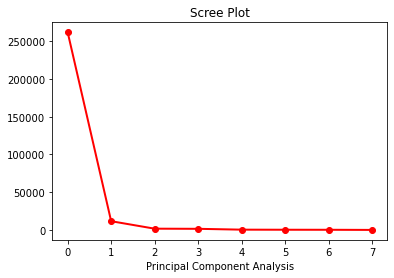

In [8]:
### GRADED

#plot of singular values here

#sort descending
sigma = np.sort(sigma)[::-1]
plt.plot(sigma, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component Analysis')
plt.show()

#how many components should you keep?
ans2 = 2

# YOUR CODE HERE
#raise NotImplementedError()

Depending on the dataset, we may have a different number of principal components to keep.  While not a hard fast statistical test, using a scree plot can provide some information on the appropriate number of values to keep.  